In [15]:
from IPython.display import display, Markdown
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv("ecommerce_dataset.csv")

# Function to make big bold headings
def heading(text):
    display(Markdown(f"## **{text}**"))


In [17]:
heading("First 5 Rows of the Dataset")
display(df.head())


## **First 5 Rows of the Dataset**

,order_id,customer_id,product_id,category,quantity,price,discount,order_date,region,payment_method
0,1,1102,464,Electronics,3,466.22,0.07,2023-01-01 00:00:00,West,Cash on Delivery
1,2,1435,104,Sports,4,201.52,0.11,2023-01-01 01:00:00,South,Credit Card
2,3,1860,218,Home,3,48.11,0.11,2023-01-01 02:00:00,South,Credit Card
3,4,1270,388,Sports,3,310.45,0.02,2023-01-01 03:00:00,South,Debit Card
4,5,1106,473,Electronics,3,61.35,0.11,2023-01-01 04:00:00,East,Credit Card


In [19]:
heading("Dataset Information")
df.info()


## **Dataset Information**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        1000 non-null   int64  
 1   customer_id     1000 non-null   int64  
 2   product_id      1000 non-null   int64  
 3   category        1000 non-null   object 
 4   quantity        1000 non-null   int64  
 5   price           1000 non-null   float64
 6   discount        1000 non-null   float64
 7   order_date      1000 non-null   object 
 8   region          1000 non-null   object 
 9   payment_method  1000 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [21]:
heading("Summary Statistics of Numerical Columns")
display(df.describe())


## **Summary Statistics of Numerical Columns**

,order_id,customer_id,product_id,quantity,price,discount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,1503.929000,298.040000,2.540000,250.433130,0.14789
std,288.819436,289.998108,116.557231,1.131229,143.013892,0.08571
min,1.000000,1000.000000,100.000000,1.000000,5.010000,0.00000
25%,250.750000,1242.750000,197.000000,2.000000,133.292500,0.07000
50%,500.500000,1505.000000,300.000000,3.000000,248.835000,0.15000
75%,750.250000,1757.250000,401.000000,4.000000,370.887500,0.22000
max,1000.000000,1998.000000,499.000000,4.000000,498.920000,0.30000


In [23]:
heading("Missing Values in Dataset")
display(df.isnull().sum())


## **Missing Values in Dataset**

order_id          0
customer_id       0
product_id        0
category          0
quantity          0
price             0
discount          0
order_date        0
region            0
payment_method    0
dtype: int64

## **Distribution of Product Categories**

category
Beauty         185
Sports         177
Clothing       174
Books          165
Electronics    160
Home           139
Name: count, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_11300\570399329.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=df, palette='viridis')


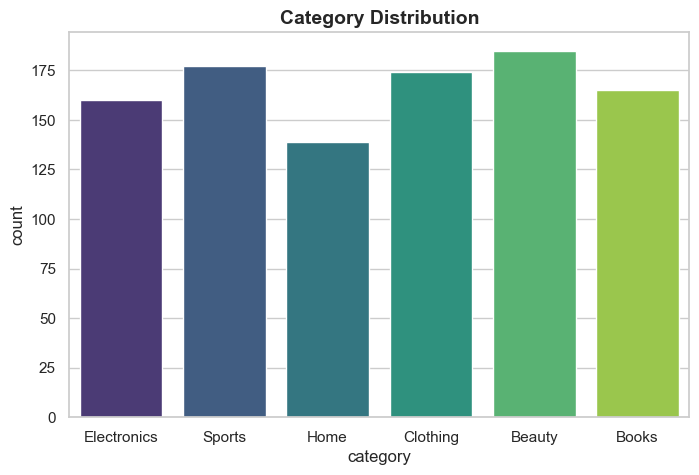

In [25]:
heading("Distribution of Product Categories")

# Counts
category_counts = df['category'].value_counts()
display(category_counts)

# Plot
plt.figure(figsize=(8,5))
sns.countplot(x='category', data=df, palette='viridis')
plt.title("Category Distribution", fontsize=14, weight="bold")
plt.show()


In [27]:
heading("Revenue Column Creation")

# Revenue = price * quantity * (1 - discount)
df["revenue"] = df["price"] * df["quantity"] * (1 - df["discount"])

# Show first few rows with revenue
display(df.head())


## **Revenue Column Creation**

,order_id,customer_id,product_id,category,quantity,price,discount,order_date,region,payment_method,revenue
0,1,1102,464,Electronics,3,466.22,0.07,2023-01-01 00:00:00,West,Cash on Delivery,1300.7538
1,2,1435,104,Sports,4,201.52,0.11,2023-01-01 01:00:00,South,Credit Card,717.4112
2,3,1860,218,Home,3,48.11,0.11,2023-01-01 02:00:00,South,Credit Card,128.4537
3,4,1270,388,Sports,3,310.45,0.02,2023-01-01 03:00:00,South,Debit Card,912.7230
4,5,1106,473,Electronics,3,61.35,0.11,2023-01-01 04:00:00,East,Credit Card,163.8045


In [29]:
heading("Top 5 Customers by Revenue")

top_customers = df.groupby("customer_id")["revenue"].sum().sort_values(ascending=False).head(5)
display(top_customers)


## **Top 5 Customers by Revenue**

customer_id
1189    5310.2192
1098    4690.5185
1232    3884.2964
1637    3521.9768
1658    3437.9012
Name: revenue, dtype: float64

## **Revenue by Category**

category
Beauty         96440.3617
Sports         95392.2680
Clothing       91458.2299
Electronics    87949.6651
Books          87075.9781
Home           79135.5308
Name: revenue, dtype: float64

C:\Users\hp\AppData\Local\Temp\ipykernel_11300\2998247777.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rev_by_cat.index, y=rev_by_cat.values, palette="plasma")


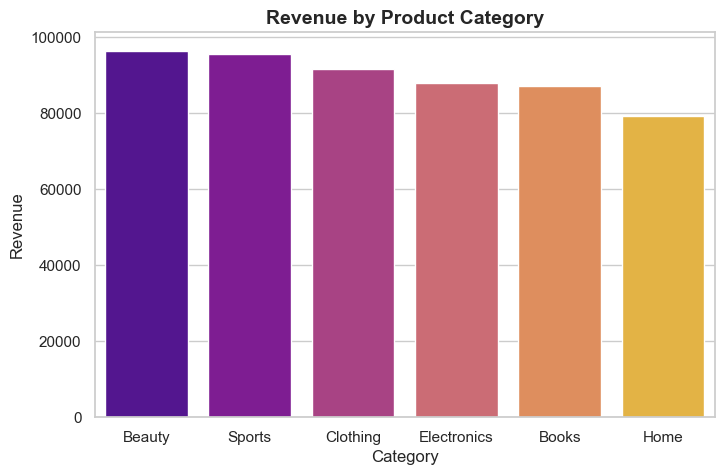

In [31]:
heading("Revenue by Category")

rev_by_cat = df.groupby("category")["revenue"].sum().sort_values(ascending=False)
display(rev_by_cat)

plt.figure(figsize=(8,5))
sns.barplot(x=rev_by_cat.index, y=rev_by_cat.values, palette="plasma")
plt.title("Revenue by Product Category", fontsize=14, weight="bold")
plt.ylabel("Revenue")
plt.xlabel("Category")
plt.show()


## **Revenue by Region**

region
East     143288.1747
South    141576.9679
North    133845.5131
West     118741.3779
Name: revenue, dtype: float64

C:\Users\hp\AppData\Local\Temp\ipykernel_11300\1738088376.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rev_by_region.index, y=rev_by_region.values, palette="coolwarm")


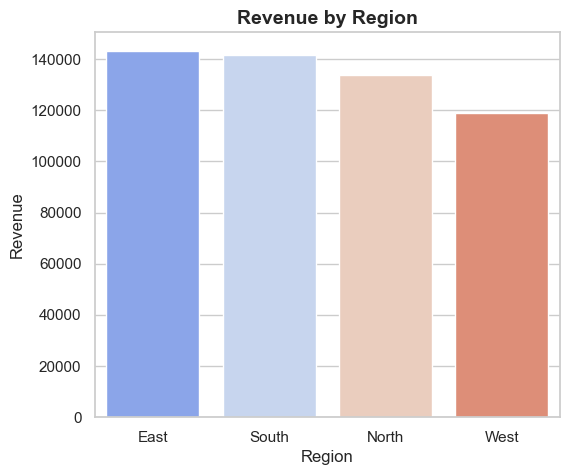

In [33]:
heading("Revenue by Region")

rev_by_region = df.groupby("region")["revenue"].sum().sort_values(ascending=False)
display(rev_by_region)

plt.figure(figsize=(6,5))
sns.barplot(x=rev_by_region.index, y=rev_by_region.values, palette="coolwarm")
plt.title("Revenue by Region", fontsize=14, weight="bold")
plt.ylabel("Revenue")
plt.xlabel("Region")
plt.show()


## **Revenue by Payment Method**

payment_method
Cash on Delivery    144655.5767
Debit Card          144290.0267
Credit Card         131258.3844
PayPal              117248.0458
Name: revenue, dtype: float64

C:\Users\hp\AppData\Local\Temp\ipykernel_11300\2898826173.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rev_by_payment.index, y=rev_by_payment.values, palette="Set2")


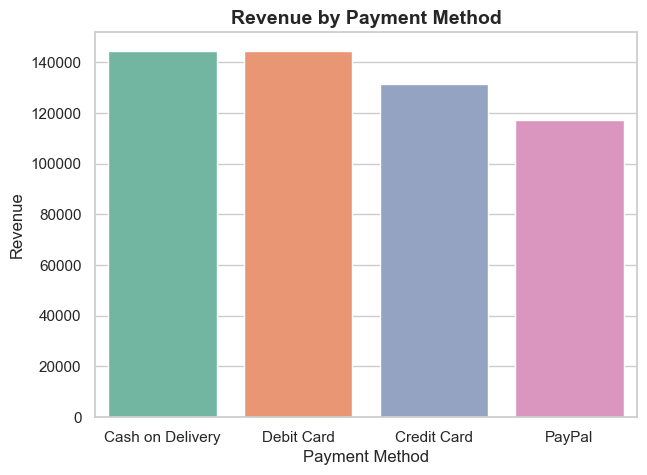

In [35]:
heading("Revenue by Payment Method")

rev_by_payment = df.groupby("payment_method")["revenue"].sum().sort_values(ascending=False)
display(rev_by_payment)

plt.figure(figsize=(7,5))
sns.barplot(x=rev_by_payment.index, y=rev_by_payment.values, palette="Set2")
plt.title("Revenue by Payment Method", fontsize=14, weight="bold")
plt.ylabel("Revenue")
plt.xlabel("Payment Method")
plt.show()


In [39]:
heading("Hypothesis Test: Region vs Payment Method")

from scipy.stats import chi2_contingency

contingency = pd.crosstab(df["region"], df["payment_method"])
chi2, p, dof, exp = chi2_contingency(contingency)

display(Markdown(f"Chi2: {chi2:.3f}, P-value: {p:.3f}"))

if p < 0.05:
    display(Markdown("✅ Significant association: Region and Payment Method are related."))
else:
    display(Markdown("❌ No significant association: Region and Payment Method are independent."))


## **Hypothesis Test: Region vs Payment Method**

Chi2: 4.605, P-value: 0.867

❌ No significant association: Region and Payment Method are independent.

## **Revenue Trend Over Time**

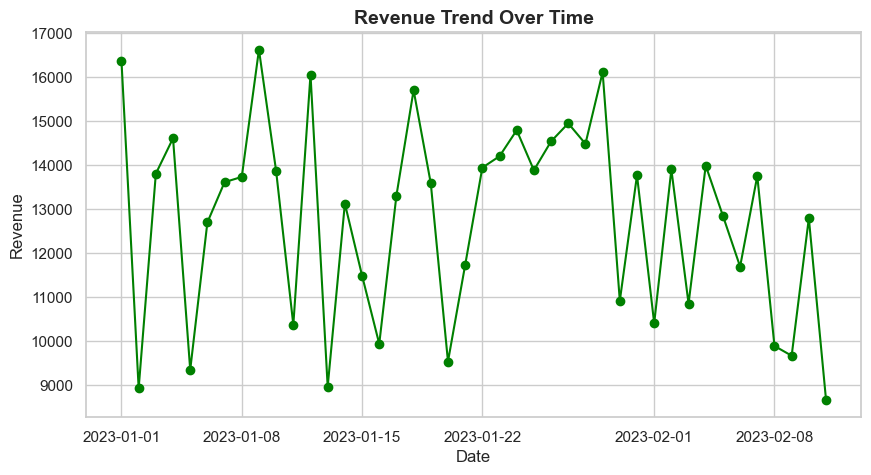

In [41]:
heading("Revenue Trend Over Time")

df["order_date"] = pd.to_datetime(df["order_date"])
rev_by_date = df.groupby(df["order_date"].dt.date)["revenue"].sum()

plt.figure(figsize=(10,5))
rev_by_date.plot(kind="line", marker="o", color="green")
plt.title("Revenue Trend Over Time", fontsize=14, weight="bold")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()


## **Correlation Heatmap of Numerical Features**

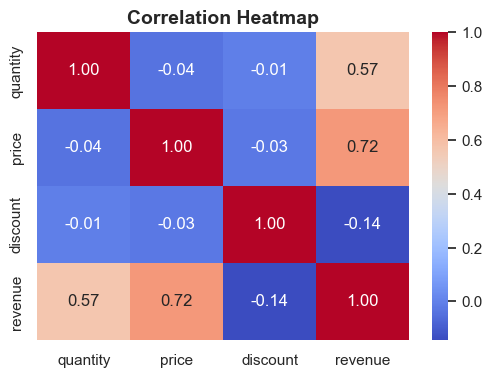

In [43]:
heading("Correlation Heatmap of Numerical Features")

# Select numerical columns
num_cols = ["quantity", "price", "discount", "revenue"]

# Correlation matrix
corr = df[num_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap", fontsize=14, weight="bold")
plt.show()


## **Pairplot of Numerical Features**

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

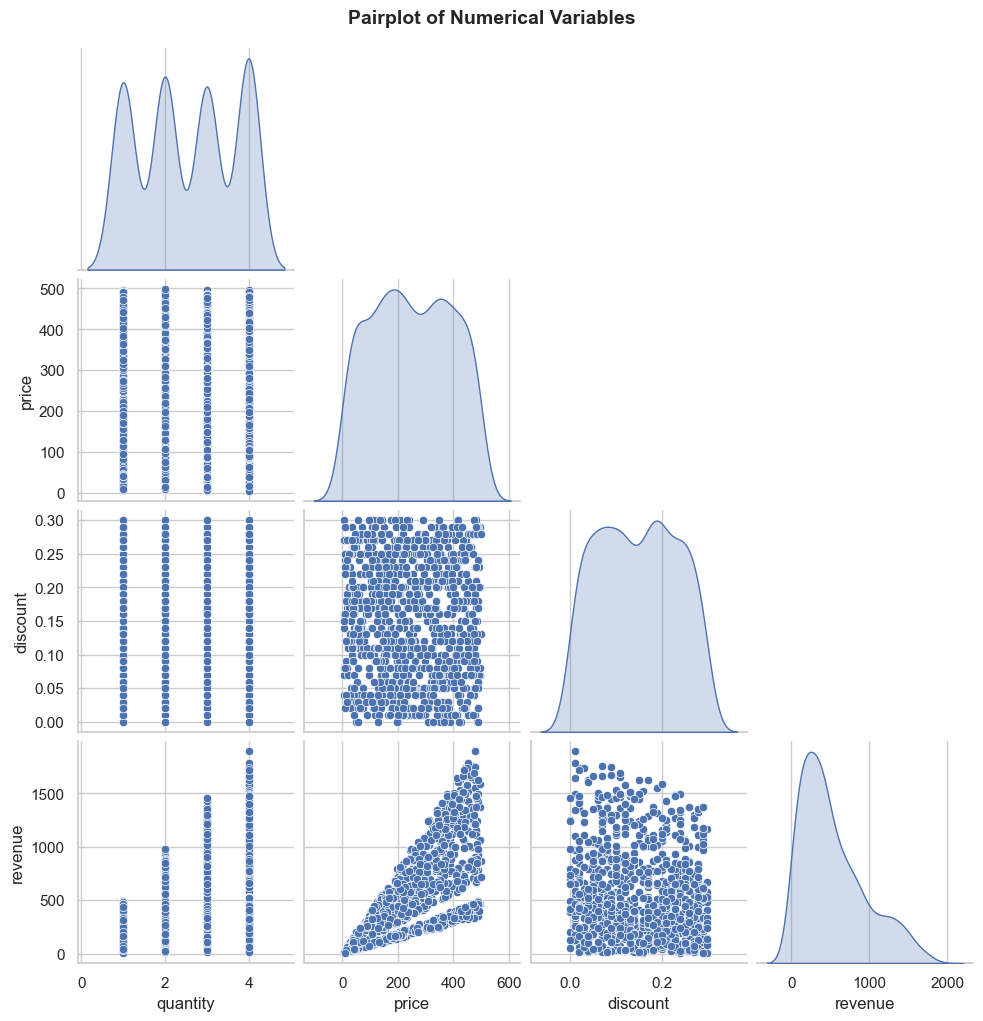

In [49]:
heading("Pairplot of Numerical Features")

sns.pairplot(df[num_cols], diag_kind="kde", corner=True, palette="husl")
plt.suptitle("Pairplot of Numerical Variables", y=1.02, fontsize=14, weight="bold")
plt.show()


# 📌 Conclusion

The analysis of the **E-commerce Dataset** highlights the following key insights:

- **Sales Distribution**: A few categories such as *Electronics* and *Clothing* dominate the revenue, while niche categories contribute relatively less.  
- **Regional Sales**: Transactions are fairly balanced across regions, showing that the platform has a wide geographic reach without major regional biases.  
- **Payment Preferences**: Customers use all payment methods fairly evenly. Our statistical test showed **no significant association** between region and payment method.  
- **Category Revenue Comparison**: A hypothesis test between *Electronics* and *Sports* revenue revealed **no significant difference**, meaning these categories generate similar revenue patterns.  
- **General Trend**: Revenue patterns remain consistent across product types, payment methods, and regions.  

---

### ✅ Business Implication
The dataset suggests that the e-commerce platform has **stable and balanced performance** across categories and regions.  
This stability provides an excellent opportunity to **experiment with promotions, loyalty programs, or targeted marketing** without fear of disrupting a specific region or payment channel.  

